In [1]:
import pandas as pd
import numpy as np
import os

from tqdm.notebook import tqdm

import seaborn as sns

import json

In [2]:
ranking_df = pd.read_csv(os.path.join('data','data.csv'), parse_dates=['Date'])

In [3]:
def get_song_id(url):
    
    if type(url)== float:
        return "no id"
    else:
        return url.split('/')[-1]

In [4]:
ranking_df['song_id']= ranking_df['URL'].apply(get_song_id)

In [5]:
ranking_df.head()

,Position,Track Name,Artist,Streams,URL,Date,Region,song_id
0,1,Reggaetón Lento (Bailemos),CNCO,19272,https://open.spotify.com/track/3AEZUABDXNtecAO...,2017-01-01,ec,3AEZUABDXNtecAOSC1qTfo
1,2,Chantaje,Shakira,19270,https://open.spotify.com/track/6mICuAdrwEjh6Y6...,2017-01-01,ec,6mICuAdrwEjh6Y6lroV2Kg
2,3,Otra Vez (feat. J Balvin),Zion & Lennox,15761,https://open.spotify.com/track/3QwBODjSEzelZyV...,2017-01-01,ec,3QwBODjSEzelZyVjxPOHdq
3,4,Vente Pa' Ca,Ricky Martin,14954,https://open.spotify.com/track/7DM4BPaS7uofFul...,2017-01-01,ec,7DM4BPaS7uofFul3ywMe46
4,5,Safari,J Balvin,14269,https://open.spotify.com/track/6rQSrBHf7HlZjtc...,2017-01-01,ec,6rQSrBHf7HlZjtcMZ4S4bO


In [6]:
ranking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 8 columns):
 #   Column      Dtype         
---  ------      -----         
 0   Position    int64         
 1   Track Name  object        
 2   Artist      object        
 3   Streams     int64         
 4   URL         object        
 5   Date        datetime64[ns]
 6   Region      object        
 7   song_id     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 210.0+ MB


In [7]:
ranking_df.shape

(3441197, 8)

In [8]:
ranking_df = ranking_df[(ranking_df['song_id']!= 'no id') & (ranking_df['Region']!= 'global') ]

In [9]:
ranking_df.shape

(3367389, 8)

In [10]:
ranking_df['Region'].nunique()

53

In [11]:
s=ranking_df.groupby(['song_id','Region'])['Date'].min().to_frame()

In [12]:
s.head()

Date
song_id                Region           
000xQL6tZNLJzIrtIgxqSl ar     2017-04-08
                       at     2017-03-24
                       au     2017-03-24
                       be     2017-03-24
                       bo     2017-04-25

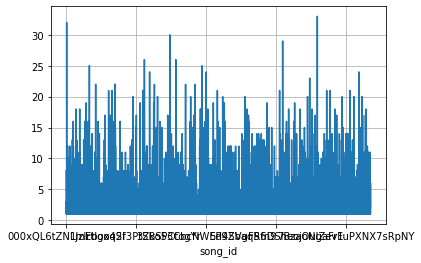

In [13]:
days_per_song= s.groupby(['song_id'])['Date'].nunique()
days_per_song.plot(grid=True);

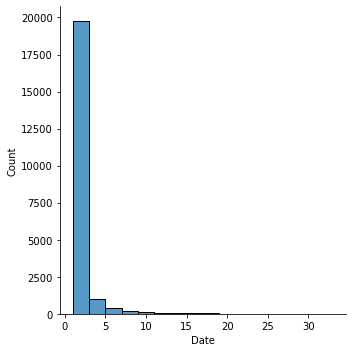

In [14]:
sns.displot(days_per_song);

In [15]:
def generate_song_sequences_fn(song_ranking):
    dates=song_ranking.groupby('Region')['Date'].min().to_frame()
    dates_sort=dates.sort_values('Date')
    dates_sort= dates_sort.reset_index().set_index('Date')
    
    dates_lst=dates_sort.index.unique().values
    l=None
    if len(dates_lst)>= 2:
        l=dates_sort.loc[dates_lst[0]].values
        l=np.array(l).flatten()

        len_=1
        for d in range(1,len(dates_lst)):
            l2=dates_sort.loc[dates_lst[d]].values
            l2=np.array(l2).flatten()
            
            if len_ < 2:
                l=[[a,b] for a in l for b in l2]
            else:
                l=[a+[b] for a in l for b in l2]            
            len_+=1
    
            """
            if len_ < 2:
                l=[(a,)+(b,) for a in l for b in l2]
            else:
                l=[a+(b,) for a in l for b in l2]
            len_+=1
            """
    return l

In [16]:
seq={}
for s in tqdm(ranking_df['song_id'].unique()):
    song_ranking= ranking_df[ranking_df['song_id']==s]
    song_seq= generate_song_sequences_fn(song_ranking)
    if song_seq is not None:
        #print(s,song_seq)
        seq[s]=song_seq

In [17]:
with open(os.path.join('data','song_sequence.json'), 'w') as json_file:
    json.dump(seq, json_file)

print("That's all folks")

----------------------------------------------------------------------------

Test code

In [21]:
song_ranking= ranking_df[ranking_df['song_id']=='3AEZUABDXNtecAOSC1qTfo']

In [22]:
dates=song_ranking.groupby('Region')['Date'].min().to_frame()

In [23]:
dates_sort=dates.sort_values('Date')

In [24]:
dates_sort= dates_sort.reset_index().set_index('Date')

In [25]:
dates_sort.head()

,Region
Date,
2017-01-01,ar
2017-01-01,py
2017-01-01,pt
2017-01-01,pe
2017-01-01,pa


In [39]:
dates_lst=dates_sort.index.unique().values
dates_lst

array(['2017-01-01T00:00:00.000000000', '2017-01-02T00:00:00.000000000',
       '2017-01-06T00:00:00.000000000', '2017-01-18T00:00:00.000000000',
       '2017-01-22T00:00:00.000000000', '2017-01-23T00:00:00.000000000',
       '2017-01-24T00:00:00.000000000', '2017-01-27T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [41]:
dates_lst[1:]

array(['2017-01-02T00:00:00.000000000', '2017-01-06T00:00:00.000000000',
       '2017-01-18T00:00:00.000000000', '2017-01-22T00:00:00.000000000',
       '2017-01-23T00:00:00.000000000', '2017-01-24T00:00:00.000000000',
       '2017-01-27T00:00:00.000000000'], dtype='datetime64[ns]')

In [46]:
if len(dates_lst)>= 2:
    do =dates_lst[0]
    l=dates_sort.loc[d_o].values
    l=np.array(l).flatten()
    
    for de in dates_lst[1:]:
        
        print((de-do)/86400000000000)

1 nanoseconds
5 nanoseconds
17 nanoseconds
21 nanoseconds
22 nanoseconds
23 nanoseconds
26 nanoseconds


In [31]:
if len(dates_lst)>= 2:
    l=dates_sort.loc[dates_lst[0]].values
    l=np.array(l).flatten()

    len_=1
    for d in tqdm(range(1,len(dates_lst))):
        l2=dates_sort.loc[dates_lst[d]].values
        l2=np.array(l2).flatten()
        
        if len_ < 2:
            l=[[a,b] for a in l for b in l2]
        else:
            l=[a+[b] for a in l for b in l2]
        len_+=1
        
l    

[['ar', 'pl'], ['py', 'pl'], ['pt', 'pl'], ['pe', 'pl'], ['pa', 'pl'], ['mx', 'pl'], ['jp', 'pl'], ['it', 'pl'], ['sv', 'pl'], ['gt', 'pl'], ['es', 'pl'], ['hn', 'pl'], ['do', 'pl'], ['cr', 'pl'], ['co', 'pl'], ['cl', 'pl'], ['ch', 'pl'], ['bo', 'pl'], ['ec', 'pl'], ['uy', 'pl']]
[['ar', 'pl', 'hu'], ['py', 'pl', 'hu'], ['pt', 'pl', 'hu'], ['pe', 'pl', 'hu'], ['pa', 'pl', 'hu'], ['mx', 'pl', 'hu'], ['jp', 'pl', 'hu'], ['it', 'pl', 'hu'], ['sv', 'pl', 'hu'], ['gt', 'pl', 'hu'], ['es', 'pl', 'hu'], ['hn', 'pl', 'hu'], ['do', 'pl', 'hu'], ['cr', 'pl', 'hu'], ['co', 'pl', 'hu'], ['cl', 'pl', 'hu'], ['ch', 'pl', 'hu'], ['bo', 'pl', 'hu'], ['ec', 'pl', 'hu'], ['uy', 'pl', 'hu']]
[['ar', 'pl', 'hu', 'cz'], ['py', 'pl', 'hu', 'cz'], ['pt', 'pl', 'hu', 'cz'], ['pe', 'pl', 'hu', 'cz'], ['pa', 'pl', 'hu', 'cz'], ['mx', 'pl', 'hu', 'cz'], ['jp', 'pl', 'hu', 'cz'], ['it', 'pl', 'hu', 'cz'], ['sv', 'pl', 'hu', 'cz'], ['gt', 'pl', 'hu', 'cz'], ['es', 'pl', 'hu', 'cz'], ['hn', 'pl', 'hu', 'cz'], ['do'

[['ar', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['py', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['pt', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['pe', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['pa', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['mx', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['jp', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['it', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['sv', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['gt', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['es', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['hn', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['do', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['cr', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['co', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['cl', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['ch', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['bo', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['ec', 'pl', 'hu', 'cz', 'be', 'at', 'nl', 'sg'],
 ['uy', 'pl', 'hu', 'cz', 'be',

In [175]:
l1=dates_sort.loc['2017-02-16'].values
l1=np.array(l1).flatten()
l1

KeyError: '2017-02-16'

In [ ]:
l2=dates_sort.loc['2017-02-17'].values
l2=np.array(l2).flatten()
l2

In [ ]:
l3=[(a,)+(b,) for a in l1 for b in l2]

In [ ]:
l3

In [ ]:
l4=dates_sort.loc['2017-02-18'].values
l4=np.array(l4).flatten()
l4

In [ ]:
l5=[a+(b,) for a in l3 for b in l4]

In [ ]:
l5

In [ ]:
len(dates)

In [ ]:
dates.iloc[0]

In [ ]:
for i in range(len(dates)):
    c2,d1 = dates.iloc[i]
    for j in range(i,len(dates)):
        c2,d2= dates.iloc[]

In [ ]:
song_ranking

In [ ]:
from tqdm.notebook import tqdm

In [ ]:
white_list= []
for song in tqdm(ranking_df['song_id'].unique()):
    song_ranking= ranking_df[ranking_df['song_id']==song]
    num_dates = song_ranking.groupby('Region')['Date'].min().nunique()
    if num_dates >= 3:
        white_list.append(song)
    #print(song,song_ranking.groupby('Region')['Date'].min().nunique())

In [ ]:
clean_ranking_df = ranking_df[ranking_df['song_id'].isin(white_list)]

In [ ]:
clean_ranking_df.shape

In [ ]:
clean_ranking_df.head()